In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import json
import joblib
from sklearn.preprocessing import LabelEncoder


In [222]:
#importar documento
df = pd.read_csv('datos_unidos_procesados.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578958 entries, 0 to 578957
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Fecha       578958 non-null  object
 1   Fuente      578958 non-null  int64 
 2   Destino     578958 non-null  int64 
 3   Estado      578958 non-null  object
 4   Minutos     578958 non-null  int64 
 5   Hora        578958 non-null  int64 
 6   Dia_semana  578958 non-null  int64 
 7   Mes         578958 non-null  int64 
 8   Dia_mes     578958 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 39.8+ MB


In [223]:
#Elimina la columna Fecha
df = df.drop(columns=['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578958 entries, 0 to 578957
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Fuente      578958 non-null  int64 
 1   Destino     578958 non-null  int64 
 2   Estado      578958 non-null  object
 3   Minutos     578958 non-null  int64 
 4   Hora        578958 non-null  int64 
 5   Dia_semana  578958 non-null  int64 
 6   Mes         578958 non-null  int64 
 7   Dia_mes     578958 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 35.3+ MB


In [224]:
#Verifica los tipos objects
colum_pre = df.select_dtypes('object').columns
colum_pre

Index(['Estado'], dtype='object')

In [225]:
# Aplicar label encoder en todas als columans categoricas o typo object
json_encoder = {}

for columna in colum_pre:
    columna_interes = df[columna]
    encoder = LabelEncoder()

    encoder.fit(columna_interes)

    mapeo_categorias= dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    # Solución 1: Convertir los valores a int nativo de Python
    # Iteramos sobre los valores del diccionario y los convertimos a int
    mapeo_categorias_limpio = {k: int(v) for k, v in mapeo_categorias.items()}
    # usar encoder para tranfromar categoria de columna de interes
    colum_tran = encoder.transform(columna_interes)

    df[columna+'_encoder'] = colum_tran

    json_encoder[columna]= mapeo_categorias_limpio

# guadarmso el json_encoder en un json 
# Nombre del archivo donde se guardará el JSON
nombre_archivo = 'Encoders/mapeo_encoders.json'

# Usamos 'with' para garantizar que el archivo se cierre correctamente
with open(nombre_archivo, 'w') as f:
    json.dump(json_encoder, f, indent=4)


df.head(6)

,Fuente,Destino,Estado,Minutos,Hora,Dia_semana,Mes,Dia_mes,Estado_encoder
0,2618,3168170365,CONTESTADO,1,7,1,6,3,0
1,2615,6027315465,NO CONTESTADO,0,7,1,6,3,2
2,2615,6027209269,NO CONTESTADO,0,7,1,6,3,2
3,2618,3245486955,NO CONTESTADO,0,7,1,6,3,2
4,2618,3016448358,NO CONTESTADO,0,7,1,6,3,2
5,2618,3017326595,CONTESTADO,3,7,1,6,3,0


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578958 entries, 0 to 578957
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Fuente          578958 non-null  int64 
 1   Destino         578958 non-null  int64 
 2   Estado          578958 non-null  object
 3   Minutos         578958 non-null  int64 
 4   Hora            578958 non-null  int64 
 5   Dia_semana      578958 non-null  int64 
 6   Mes             578958 non-null  int64 
 7   Dia_mes         578958 non-null  int64 
 8   Estado_encoder  578958 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 39.8+ MB


In [227]:
# con la estrategia aplicada seleecionamos la columnas con ls que se va a entrenar relamente
# si necesitan incluir ms tipos de datos utilizar la propiedad include=['int', 'float'] dentro de select.types()
df_listo = df.select_dtypes('int')
df_listo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578958 entries, 0 to 578957
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Fuente          578958 non-null  int64
 1   Destino         578958 non-null  int64
 2   Minutos         578958 non-null  int64
 3   Hora            578958 non-null  int64
 4   Dia_semana      578958 non-null  int64
 5   Mes             578958 non-null  int64
 6   Dia_mes         578958 non-null  int64
 7   Estado_encoder  578958 non-null  int64
dtypes: int64(8)
memory usage: 35.3 MB


In [228]:
# selecionar variable obejto y vriable independitnes es lo que llamaremos 
# matriz x = independientes 
# vector y =  dependiente

X = df_listo.drop(columns=['Estado_encoder']) # se elimina la vairbale objetivo y se genera la matriz X

y = df_listo['Estado_encoder'] # solo se toma la viable objetivo


In [229]:
# corte de datos en entrenamiento y prueba de modelos
#from sklearn.model_selection import train_test_split

# División del conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.9, random_state= 42 )

print('Conjunto de datos de entrada de entrenamiento X_train:', X_train.shape)
print('Conjunto de datos de salida de entrenamiento y_train:', y_train.shape)

print('Conjunto de datos de entrada de prueba X_test:', X_test.shape)
print('Conjunto de datos de salida de prueba y_test:', y_test.shape)

Conjunto de datos de entrada de entrenamiento X_train: (57895, 7)
Conjunto de datos de salida de entrenamiento y_train: (57895,)
Conjunto de datos de entrada de prueba X_test: (521063, 7)
Conjunto de datos de salida de prueba y_test: (521063,)


## Entrenamiento del modelo con random forest

In [230]:
model_rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)# Entrenar modelo de machine learning
model_dt = DecisionTreeClassifier()

In [231]:
# Entrenar model DecisionTreeClassifier()

#.fit(): Es el método o la acción de "aprender" o "entrenar". Le dice al modelo: 
# "Es hora de estudiar los datos que te voy a dar".
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score( y_test, y_pred_dt)

print('Exactitud del modelo DecisionTreeClassifier = ', accuracy_dt)
# y_pred ahora contiene las predicciones del modelo para cada fila en X_test
print("Primeras 5 predicciones:", y_pred_dt[:5])
print("Primeros 5 valores reales:", y_test.head().values)


Exactitud del modelo DecisionTreeClassifier =  0.9632501252247809
Primeras 5 predicciones: [2 2 0 2 2]
Primeros 5 valores reales: [2 2 0 2 2]


In [232]:
# Entrenar model RandomForestClassifier

model_rfc.fit(X_train, y_train)

y_pred_dt_3 = model_rfc.predict(X_test)

accuracy_dt_3 = accuracy_score( y_test, y_pred_dt_3)

print('Exactitud del modelo RandomForestClassifier = ', accuracy_dt_3)

Exactitud del modelo RandomForestClassifier =  0.9786091125257407


In [233]:
from sklearn.metrics import classification_report, accuracy_score

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_dt))

# También puedes calcular la exactitud por separado
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Exactitud del modelo: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    239297
           1       0.23      0.26      0.24      3182
           2       0.97      0.96      0.97    271428
           3       0.16      0.17      0.16      7156

    accuracy                           0.96    521063
   macro avg       0.59      0.60      0.59    521063
weighted avg       0.96      0.96      0.96    521063

Exactitud del modelo: 0.96


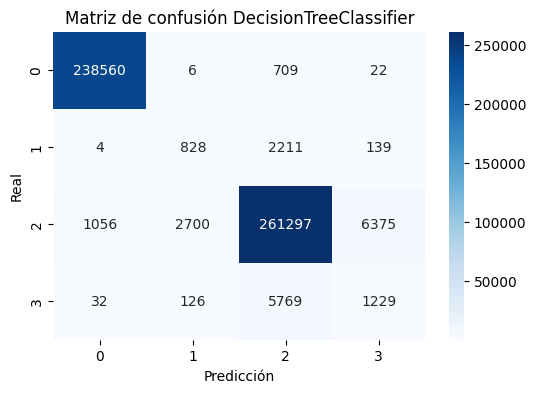

In [234]:
# Evaluación adicional del rendimiento del modelo DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión DecisionTreeClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Calcular ROC AUC si es binario
if len(set(y_test)) == 2:
    auc = roc_auc_score(y_test, y_pred_dt)
    print(f"ROC AUC: {auc:.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    239297
           1       0.25      0.00      0.00      3182
           2       0.96      1.00      0.98    271428
           3       0.78      0.00      0.00      7156

    accuracy                           0.98    521063
   macro avg       0.75      0.50      0.50    521063
weighted avg       0.97      0.98      0.97    521063



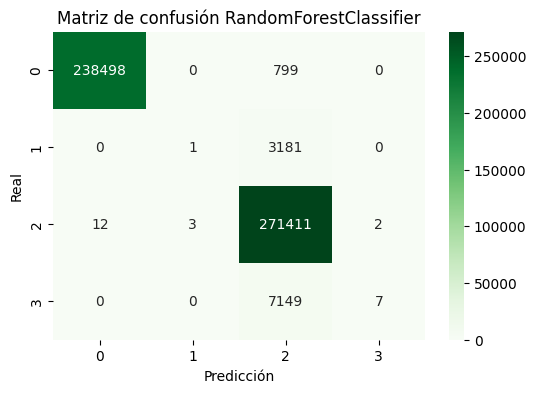

In [235]:
# Evaluación del rendimiento del modelo RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reporte de clasificación
print(classification_report(y_test, y_pred_dt_3))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_dt_3)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de confusión RandomForestClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Calcular ROC AUC si es binario
if len(set(y_test)) == 2:
    auc_rf = roc_auc_score(y_test, y_pred_dt_3)
    print(f"ROC AUC RandomForestClassifier: {auc_rf:.2f}")

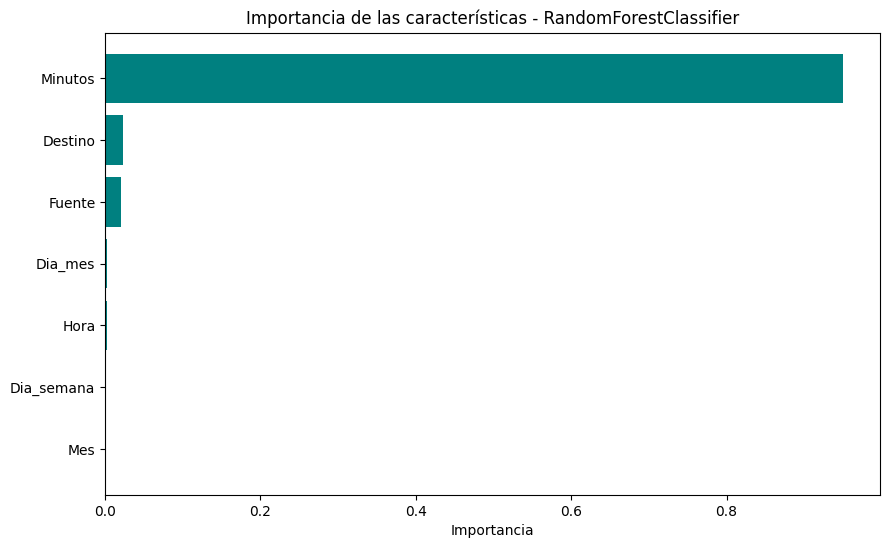

  Característica  Importancia
2        Minutos     0.950194
1        Destino     0.023153
0         Fuente     0.020354
6        Dia_mes     0.002271
3           Hora     0.001829
4     Dia_semana     0.001243
5            Mes     0.000956


In [236]:
# Importancia de las características según RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Obtener importancias
importancias = model_rfc.feature_importances_
nombres_columnas = X_train.columns

# Crear un DataFrame ordenado
df_importancias = pd.DataFrame({'Característica': nombres_columnas, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de las características - RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()

# Mostrar tabla ordenada
print(df_importancias)

### Interpretación y recomendaciones basadas en la importancia de las características
Las variables con mayor importancia en el modelo RandomForestClassifier son las que más influyen en la predicción de llamadas contestadas. Se recomienda:
- Analizar las características más relevantes para entender el comportamiento del sistema.
- Considerar las variables principales para futuras mejoras de modelos o para la toma de decisiones.
- Si alguna característica tiene baja importancia, podría evaluarse su exclusión en modelos futuros para simplificar el análisis.
- Revisar si las variables más importantes tienen sentido desde el punto de vista del negocio y validar con expertos.

In [237]:

# Guardar el modelo entrenado en un archivo
joblib.dump(model_rfc, 'modelo_clasificador_llamadas.pkl')

# Para cargarlo en el futuro:
# modelo_cargado = joblib.load('modelo_clasificador_llamadas.pkl')


['modelo_clasificador_llamadas.pkl']

In [238]:
# Guardar el modelo DecisionTreeClassifier entrenado

joblib.dump(model_dt, 'modelo_decisiontree_llamadas.pkl')



['modelo_decisiontree_llamadas.pkl']